In [444]:
#!pip install scikit-image

In [445]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

In [446]:
car_image = imread("images/40.jpg",as_gray=True)
print(car_image.shape)

(384, 288)


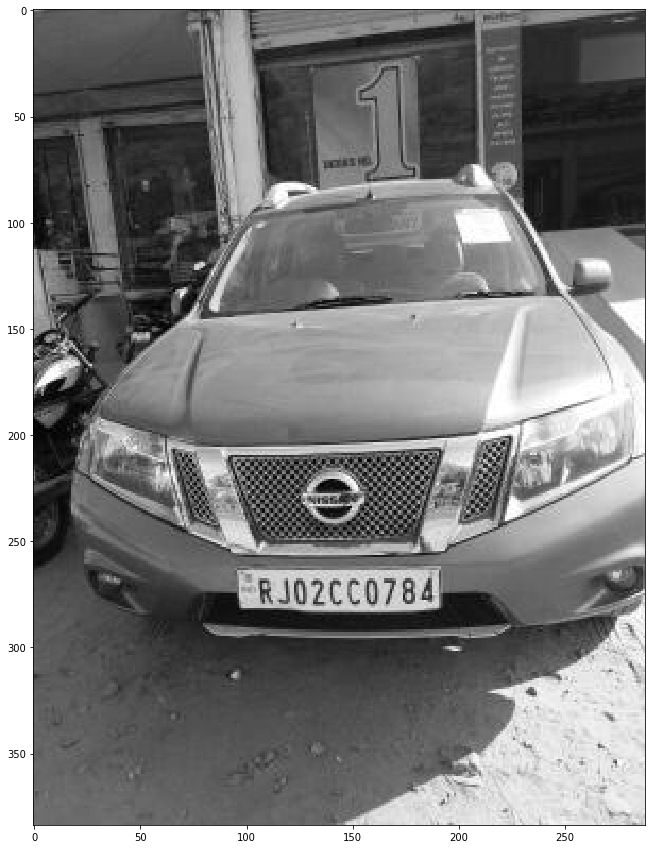

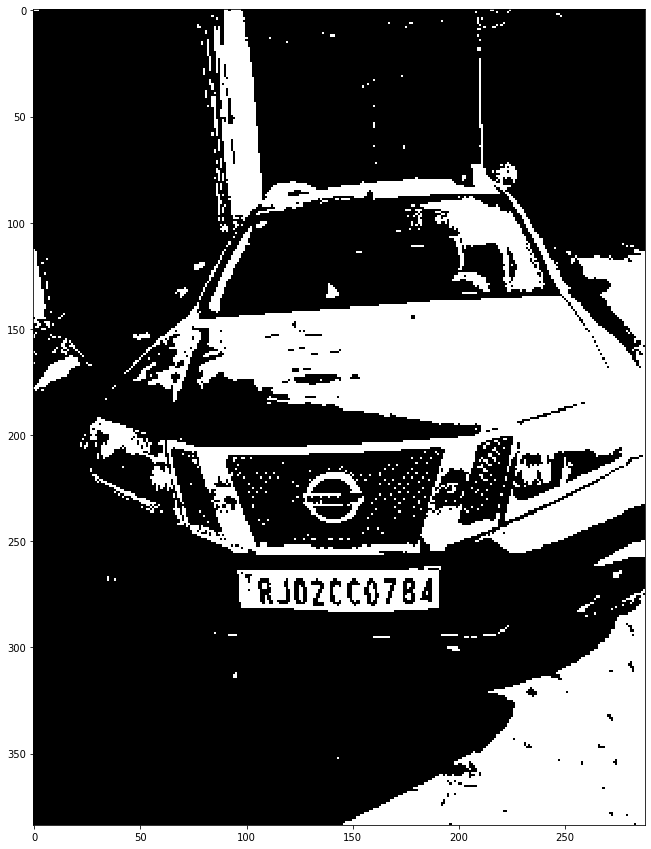

In [447]:
gray_car_image = car_image * 255
gray_car_image[0]
#plt.figure(figsize=(10,20))
fig ,(ax1) = plt.subplots(figsize=(15,15))
ax1.imshow(gray_car_image,cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > (threshold_value+20)
fig ,(ax2) = plt.subplots(figsize=(15,15))
ax2.imshow(binary_car_image,cmap="gray")
plt.show()

##localization.py

In [448]:
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import localization

In [449]:
##This section marks rectangle on every section of the image

# label_image = measure.label(binary_car_image)
# fig, (ax1) = plt.subplots(figsize=(15,20))
# ax1.imshow(gray_car_image, cmap='gray')

# # regionprops creates a list of properties of all the labelled regions

# for region in regionprops(label_image):
#     if region.area < 50:
#         continue
    
#     minRow,minCol,maxRow,maxCol = region.bbox
#     rectBorder = patches.Rectangle((minCol,minRow),maxCol-minCol,maxRow-minRow,edgecolor="red",linewidth=2,fill=False)
#     ax1.add_patch(rectBorder)
    
# plt.show()

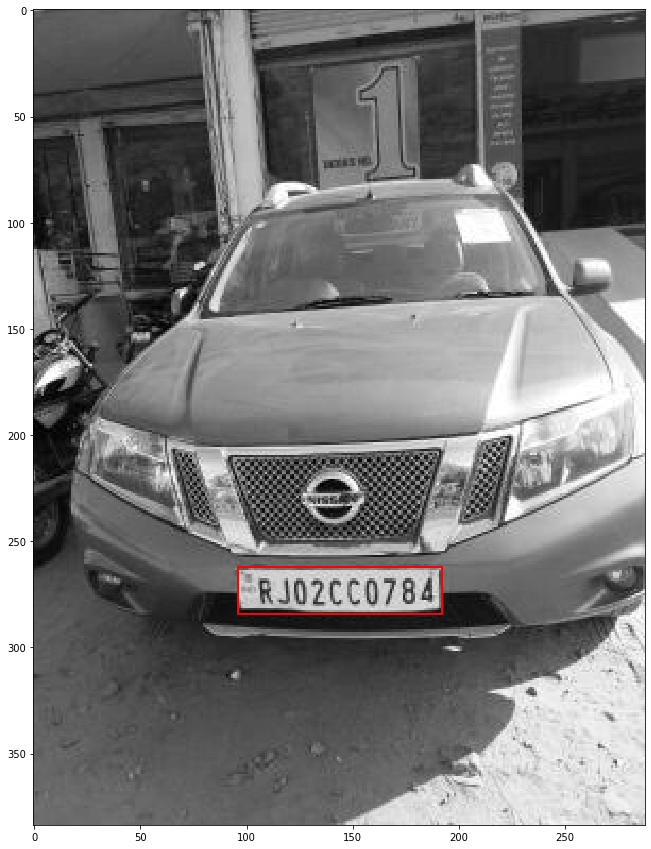

In [450]:
label_image = measure.label(binary_car_image)

plate_dimensions = (0.03 * label_image.shape[0],0.3 * label_image.shape[0],0.09 * label_image.shape[1],0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []

fig, (ax1) = plt.subplots(figsize = (15,15))
ax1.imshow(gray_car_image,cmap='gray')

for region in regionprops(label_image):
    if(region.area < 1000):
        continue
    
    min_row, min_col, max_row, max_col = region.bbox
    region_height = max_row - min_row
    region_width = max_col - min_col
    
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width > region_height and region_width >= 2*region_height:
        plate_like_objects.append(binary_car_image[min_row:max_row,min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col, max_row, max_col))
        rectBorder = patches.Rectangle((min_col,min_row),max_col - min_col, max_row - min_row, edgecolor="red", linewidth=2,fill=False)
        ax1.add_patch(rectBorder)
    
plt.show()

#cca.py

1


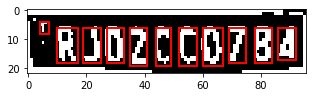

In [451]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt
#import cca

print(len(plate_like_objects))
for plate_object in plate_like_objects:
    license_plate = np.invert(plate_object)
    labelled_plate = measure.label(license_plate)

    fig, ax1 = plt.subplots(figsize=(5,5))
    ax1.imshow(license_plate,cmap="gray")

    character_dimensions = (0.10 * license_plate.shape[0],0.80 * license_plate.shape[0], 0.025 * license_plate.shape[1],0.15 * license_plate.shape[1])
    min_height, max_height, min_width, max_width = character_dimensions

    characters = []
    counter = 0
    column_list = []

    for regions in regionprops(labelled_plate):
        y0,x0,y1,x1 = regions.bbox
        region_height = y1 - y0
        region_width = x1 - x0

        if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
            roi = license_plate[y0:y1,x0:x1]

            rect_border = patches.Rectangle((x0,y0),x1-x0,y1-y0,edgecolor='red',linewidth=2,fill=False)
            ax1.add_patch(rect_border)

            resized_char = resize(roi, (20,20))
            characters.append(resized_char)

            column_list.append(x0)

    plt.show()
